<a href="https://colab.research.google.com/github/Haarrsshhiitt/Python-with-Pandas-PCA/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("/content/Ecommerce Customers")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [18]:
df=df.drop(['Email','Address'],axis=1)

<Figure size 720x720 with 0 Axes>

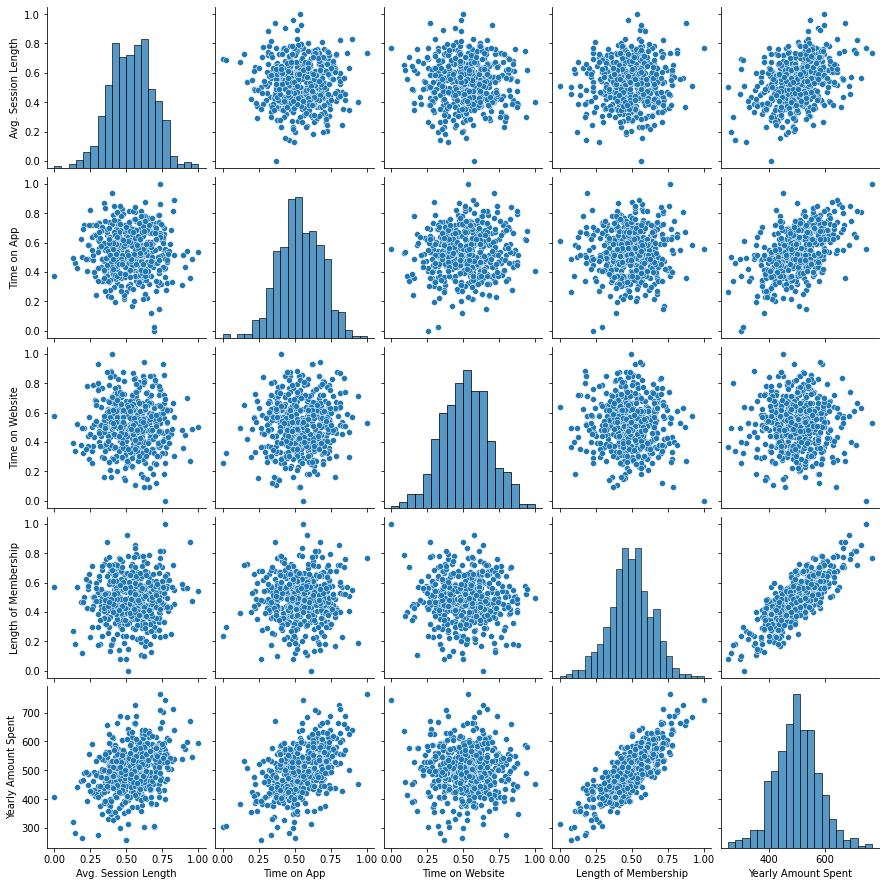

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.pairplot(data = df)
plt.show()

In [20]:
df.columns

Index(['Avatar', 'Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
from sklearn.preprocessing import MinMaxScaler
features = ['Avg. Session Length', 'Time on App', 'Time on Website','Length of Membership']
scaler=MinMaxScaler()
df[features]= scaler.fit_transform(df[features])

In [22]:
df.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,Violet,0.751425,0.626620,0.929816,0.573101,587.951054
1,DarkGreen,0.362306,0.393016,0.550801,0.359869,392.204933
2,Bisque,0.524953,0.426378,0.524803,0.576396,487.547505
3,SaddleBrown,0.722409,0.787050,0.460890,0.428434,581.852344
4,MediumAquaMarine,0.574861,0.647702,0.594748,0.627768,599.406092


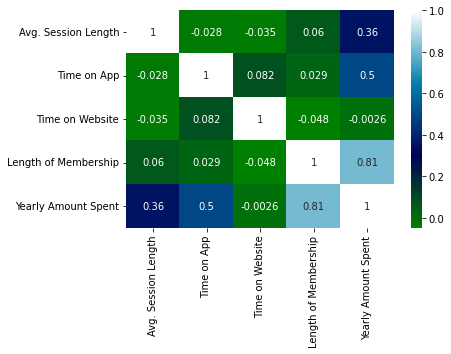

In [23]:
sns.heatmap(df.corr(), annot = True, cmap = 'ocean')

In [24]:
df = df.drop('Avatar', axis = 1)
X = df.drop('Yearly Amount Spent', axis = 1)
y = df['Yearly Amount Spent']

In [25]:
print(X.shape, y.shape)

(500, 4) (500,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = lr.predict(X_train)

In [33]:
print(lr.score(X_train, y_train) )

0.9852333821159803


In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_test,y_pred)

102.44950815251372

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

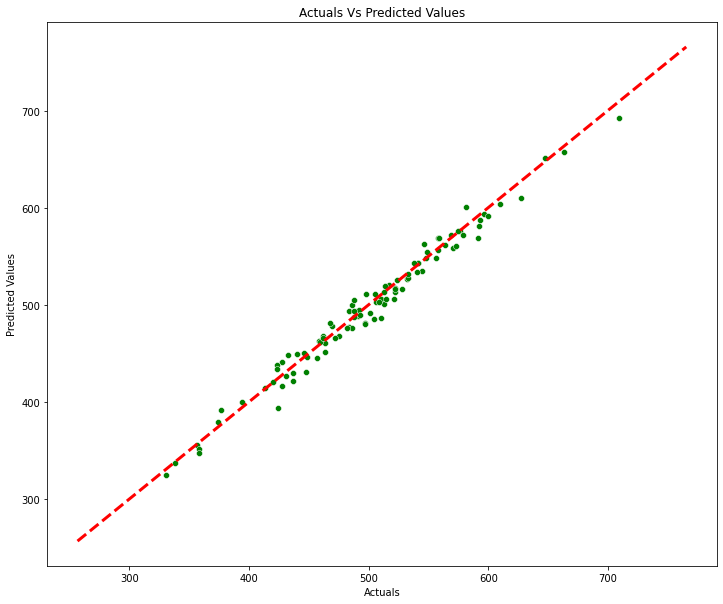

In [37]:
plt.figure(figsize = (12,10))
sns.scatterplot(y_test, y_pred, color = 'green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')